# MileStone 1

------------------------------------------------

## Perkenalan
> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

**Nama :** William Hugo Ravindra Putra

**Batch :** 11

**DataSet :** credit_card_default from Google Cloud Platform

**Objective :**
- Mampu memperoleh data menggunakan BigQuery
- Mampu memahami konsep supervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning
- Mampu mengimplementasikan supervised learning dengan data yang diberikan
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning

**Problems :**
1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
> Untuk menghitung / mengukur kualitas split dalam Decision Tree-nya. Gini-Impurity adalah perhitungan berapa banyak titik data yang benar di bagian/area, jadi semakin rendah Gini-Impurity semakin baik kategorisasi datanya
2. Apakah fungsi dari pruning pada Tree model?
> Pruning mengurangi kompleksitas pohon akhir yang mengakibatkan mengurangi overfitting
3. Bagaimana cara memilih K yang optimal pada KNN?
> Nilai K optimal yang biasanya ditemukan adalah akar kuadrat dari N, di mana N adalah jumlah total sampel
4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
> Cross-Validation adalah teknik yang digunakan untuk menilai seberapa baik performa model Machine learning-nya pada data yang tidak terlihat
5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!
> - Accuracy mewakili jumlah instance data yang diklasifikasikan dengan benar di atas jumlah total instance data
> - Precision adalah ukuran untuk menentukan jika copy of Positive False/True tinggi
> - Recall menghitung berapa banyak Actual Positive yang ditangkap model kami melalui pelabelannya sebagai Positive
> - F1 Score adalah untuk menghitung keseimbangan atau balance anatar Precision dan Recall

**Query**

select limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month

from `bigquery-public-data.ml_datasets.credit_card_default`

limit 22044;

------------------------------------------------

## Import Libraries
> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
import pickle


------------------------------------------------

## Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [39]:
#DataSet Loading
df = pd.read_csv('h8dsft_P1M1_William-Hugo.csv')
#Displaying DataFrame
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


In [40]:
#Checking description of DataFrame
df.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


In [41]:
#Checking information on DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [42]:
#Checking Missing Value
df.isnull().sum().sum()

0

In [43]:
#Making copy of data to Manipulate
df1 = df.copy()

### Context
1. limit_balance
> Amount of given credit in NT dollars (includes individual and family/supplementary credit
2. education_level
> Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
3. pay_0
> Repayment status in September, 2005
4. pay_2
> Repayment status in August, 2005
5. pay_3
> Repayment status in July, 2005
6. pay_4
> Repayment status in June, 2005
7. pay_5
> Repayment status in May, 2005
8. pay_6
> Repayment status in April, 2005
- -1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above
9. bill_amt_1
> Amount of bill statement in September, 2005
10. bill_amt_2
> Amount of bill statement in August, 2005
11. bill_amt_3
> Amount of bill statement in July, 2005
12. bill_amt_4
> Amount of bill statement in June, 2005
13. bill_amt_5
> Amount of bill statement in May, 2005
14. bill_amt_6
> Amount of bill statement in April, 2005 
15. pay_amt_1
> Amount of previous payment in September, 2005
16. pay_amt_2
> Amount of previous payment in August, 2005
17. pay_amt_3
> Amount of previous payment in July, 2005
18. pay_amt_4
> Amount of previous payment in June, 2005
19. pay_amt_5
> Amount of previous payment in May, 2005
20. pay_amt_6
> Amount of previous payment in April, 2005


In [44]:
#Renaming Column Name
df1.rename(columns = {'pay_0':'repay_sept', 'pay_2':'repay_aug', 'pay_3':'repay_july', 'pay_4':'repay_june',
                     'pay_5':'repay_may', 'pay_6':'repay_april'}, inplace = True)
df1.rename(columns = {'bill_amt_1':'bill_sept', 'bill_amt_2':'bill_aug', 'bill_amt_3':'bill_july', 'bill_amt_4':'bill_june',
                    'bill_amt_5':'bill_may', 'bill_amt_6':'bill_april'}, inplace = True)
df1.rename(columns = {'pay_amt_1':'paid_sept', 'pay_amt_2':'paid_aug', 'pay_amt_3':'paid_july', 'pay_amt_4':'paid_june',
                    'pay_amt_5':'paid_may', 'pay_amt_6':'paid_april'}, inplace = True)

> I'm renaming the column so I won't be confused when calling and understanding the columns. Just for personal preference

In [45]:
#Checking if the renaming worked
df1.head()

,limit_balance,sex,education_level,marital_status,age,repay_sept,repay_aug,repay_july,repay_june,repay_may,...,bill_june,bill_may,bill_april,paid_sept,paid_aug,paid_july,paid_june,paid_may,paid_april,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


In [46]:
#Checking to see duplicated rows
df1.duplicated().sum()

1

In [47]:
#Seeing the duplicated row
duplicateRows = df1[df1.duplicated()]
print(duplicateRows)

      limit_balance  sex  education_level  marital_status   age  repay_sept  \
2245       200000.0    2                1               1  34.0         1.0   

      repay_aug  repay_july  repay_june  repay_may  ...  bill_june  bill_may  \
2245       -2.0        -2.0        -2.0         -2  ...        0.0       0.0   

      bill_april  paid_sept  paid_aug  paid_july  paid_june  paid_may  \
2245         0.0        0.0       0.0        0.0        0.0       0.0   

      paid_april  default_payment_next_month  
2245         0.0                           0  

[1 rows x 24 columns]


In [48]:
#Dropping/Deleting duplicated row
df1.drop_duplicates()

,limit_balance,sex,education_level,marital_status,age,repay_sept,repay_aug,repay_july,repay_june,repay_may,...,bill_june,bill_may,bill_april,paid_sept,paid_aug,paid_july,paid_june,paid_may,paid_april,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


------------------------------------------------

## Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

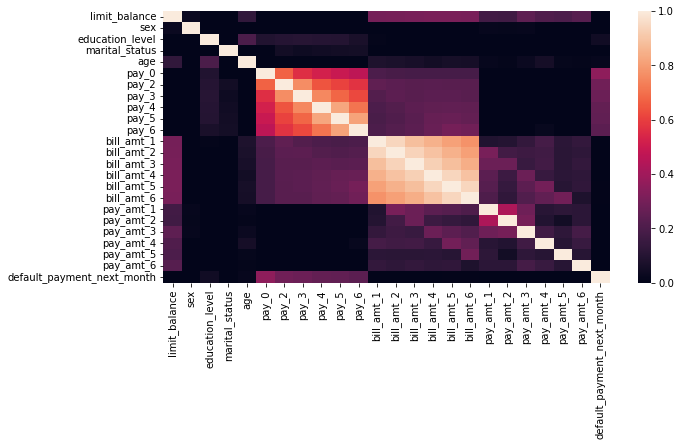

In [49]:
#Melihat correlasi dalam DataSet
corr = df.corr()

#Code untuk menampilkan heatmap correlation
plt.figure(figsize=(10,5))
sns.heatmap(corr, vmin=0, vmax=1)
plt.show()

> Here I can see that the correlation of each columns with another. I can see that the pay_... column has correlation with other column of pay_..., same with bill_...

> This makes sense as it takes the information of the previous months and adds it up

Text(0.5, 1.0, 'Histogram of limit_balance')

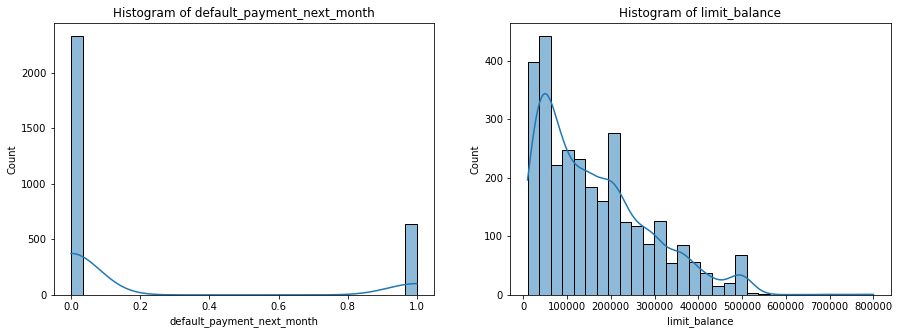

In [50]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1) # (row, column, index)
sns.histplot(df['default_payment_next_month'], bins=30, kde=True)
plt.title('Histogram of default_payment_next_month')

plt.subplot(1,2,2) # (row, column, index)
sns.histplot(df['limit_balance'], bins=30, kde=True)
plt.title('Histogram of limit_balance')

> From the graph above, I can see the graphs for the column default_payment_next_month and limit_balance

> For default_payment_next_month, I can see that there are only 2 'options' which are 0 = No and 1 = Yes

> For limit balance, I can see that most people have a limit of under 100 000. Which makes sense, as the data is wanting to find if someone will pay their bills next month. With a lower limit balance, I can conclude (from personal logic) that they are not as wealthy which in turn makes some of them not be able to pay for all their bills

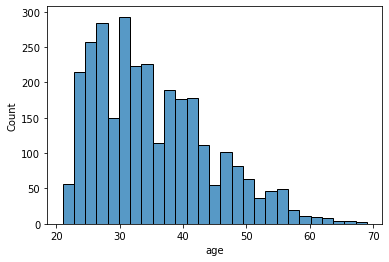

In [51]:
ax = sns.histplot(x="age", data=df)

> From the graph above, I'm checking the range of ages in the dataset and can see that the majority in the DataSet are people in their 20-35's

> From that I can analyse that on average most people have jobs that makes sure that they are able to pay their bills eventually

> Unlike the elderly, where they might be relying on their pension to pay their bills

<AxesSubplot:xlabel='repay_sept', ylabel='repay_aug'>

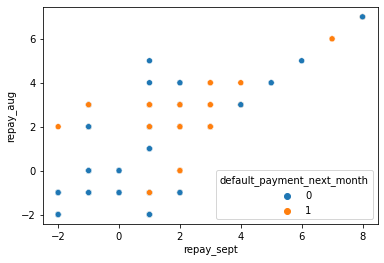

In [52]:
sns.scatterplot(x="repay_sept", y="repay_aug", hue="default_payment_next_month", data=df1)

<AxesSubplot:xlabel='repay_july', ylabel='repay_june'>

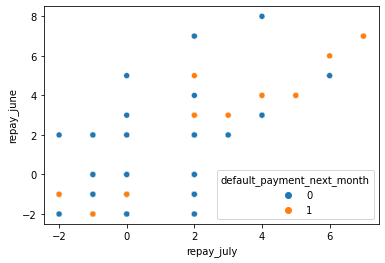

In [53]:
sns.scatterplot(x="repay_july", y="repay_june", hue="default_payment_next_month", data=df1)

> From the 2 graphs, I'm checking if the column repay significantly affects the default_payment_next_month. And since the data is considered scattered (in my opinion), the outcome of default_payment_next_month is not solely dependant on the repay column

------------------------------------------------

## Data Preprocessing
> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### Model Inference

In [54]:
#Get Data for Model Inference
data_inf = df1.sample(10, random_state=17)
data_inf

,limit_balance,sex,education_level,marital_status,age,repay_sept,repay_aug,repay_july,repay_june,repay_may,...,bill_june,bill_may,bill_april,paid_sept,paid_aug,paid_july,paid_june,paid_may,paid_april,default_payment_next_month
91,420000.0,2,2,2,32.0,0.0,0.0,0.0,0.0,0,...,198925.0,175684.0,164037.0,7300.0,8839.0,8000.0,5900.0,6000.0,6000.0,0
325,30000.0,2,2,2,25.0,2.0,0.0,0.0,0.0,0,...,12473.0,12623.0,27460.0,1200.0,1201.0,592.0,500.0,1500.0,0.0,1
47,40000.0,2,3,1,60.0,0.0,0.0,0.0,0.0,0,...,21058.0,8204.0,9899.0,2000.0,3000.0,3000.0,6000.0,2000.0,2000.0,0
1488,70000.0,2,3,3,39.0,0.0,0.0,-1.0,0.0,-1,...,15133.0,3148.0,4699.0,3000.0,11000.0,5000.0,3150.0,2000.0,4000.0,0
446,60000.0,2,2,2,24.0,-1.0,0.0,-1.0,0.0,0,...,10213.0,10000.0,11832.0,1020.0,9479.0,1000.0,200.0,1832.0,5889.0,0
567,300000.0,2,1,1,30.0,0.0,0.0,0.0,0.0,0,...,76244.0,67747.0,70389.0,3000.0,5000.0,2500.0,2500.0,3500.0,87000.0,1
1473,500000.0,1,1,2,43.0,0.0,0.0,0.0,-1.0,-1,...,3887.0,0.0,7413.0,22650.0,0.0,3887.0,0.0,7413.0,0.0,1
548,490000.0,2,2,1,30.0,0.0,0.0,0.0,0.0,0,...,16995.0,-1527.0,62491.0,2003.0,2041.0,1092.0,4.0,64895.0,3003.0,0
1768,80000.0,1,1,2,26.0,1.0,2.0,2.0,0.0,0,...,40793.0,42990.0,42854.0,2000.0,0.0,1603.0,3000.0,2000.0,1056.0,0
1781,130000.0,2,2,1,34.0,2.0,2.0,2.0,2.0,2,...,32336.0,34186.0,34588.0,2500.0,3000.0,0.0,2600.0,1000.0,1500.0,1


In [55]:
#Remove Inference Set
data_train_test = df1.drop(data_inf.index)
data_train_test

,limit_balance,sex,education_level,marital_status,age,repay_sept,repay_aug,repay_july,repay_june,repay_may,...,bill_june,bill_may,bill_april,paid_sept,paid_aug,paid_july,paid_june,paid_may,paid_april,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


In [56]:
#Reset Index
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,limit_balance,sex,education_level,marital_status,age,repay_sept,repay_aug,repay_july,repay_june,repay_may,...,bill_june,bill_may,bill_april,paid_sept,paid_aug,paid_july,paid_june,paid_may,paid_april,default_payment_next_month
0,420000.0,2,2,2,32.0,0.0,0.0,0.0,0.0,0,...,198925.0,175684.0,164037.0,7300.0,8839.0,8000.0,5900.0,6000.0,6000.0,0
1,30000.0,2,2,2,25.0,2.0,0.0,0.0,0.0,0,...,12473.0,12623.0,27460.0,1200.0,1201.0,592.0,500.0,1500.0,0.0,1
2,40000.0,2,3,1,60.0,0.0,0.0,0.0,0.0,0,...,21058.0,8204.0,9899.0,2000.0,3000.0,3000.0,6000.0,2000.0,2000.0,0
3,70000.0,2,3,3,39.0,0.0,0.0,-1.0,0.0,-1,...,15133.0,3148.0,4699.0,3000.0,11000.0,5000.0,3150.0,2000.0,4000.0,0
4,60000.0,2,2,2,24.0,-1.0,0.0,-1.0,0.0,0,...,10213.0,10000.0,11832.0,1020.0,9479.0,1000.0,200.0,1832.0,5889.0,0
5,300000.0,2,1,1,30.0,0.0,0.0,0.0,0.0,0,...,76244.0,67747.0,70389.0,3000.0,5000.0,2500.0,2500.0,3500.0,87000.0,1
6,500000.0,1,1,2,43.0,0.0,0.0,0.0,-1.0,-1,...,3887.0,0.0,7413.0,22650.0,0.0,3887.0,0.0,7413.0,0.0,1
7,490000.0,2,2,1,30.0,0.0,0.0,0.0,0.0,0,...,16995.0,-1527.0,62491.0,2003.0,2041.0,1092.0,4.0,64895.0,3003.0,0
8,80000.0,1,1,2,26.0,1.0,2.0,2.0,0.0,0,...,40793.0,42990.0,42854.0,2000.0,0.0,1603.0,3000.0,2000.0,1056.0,0
9,130000.0,2,2,1,34.0,2.0,2.0,2.0,2.0,2,...,32336.0,34186.0,34588.0,2500.0,3000.0,0.0,2600.0,1000.0,1500.0,1


> Here I am making Data Inference to be used to Predict the outcome of the best model. Basically just for visualisation

### Splitting Data

In [57]:
#Split between 'X' (features) and 'y' (target)
X = data_train_test.drop('default_payment_next_month', axis=1) #axis=1 ==> column
y = data_train_test['default_payment_next_month']
X.head()

,limit_balance,sex,education_level,marital_status,age,repay_sept,repay_aug,repay_july,repay_june,repay_may,...,bill_july,bill_june,bill_may,bill_april,paid_sept,paid_aug,paid_july,paid_june,paid_may,paid_april
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0


> Here I have chosen default_payment_next_month as the target as it makes the most sense as the entire data is based on payment. And I would like to see if my model is able to predict will be able to pay their bills next month based on their previous payment history

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (2364, 23)
Test Size:  (591, 23)


> Here I am splitting the data into 80% and 20%, because since the data is considered little/not much, I want the model to learn as much as possible without affecting the test set outcome

In [59]:
#Check missing value on the split data
print('X-train:', X_train.isnull().sum().sum())
print('y-train:', y_train.isnull().sum().sum())
print('X-test:', X_test.isnull().sum().sum())
print('y-test;', y_test.isnull().sum().sum())


X-train: 0
y-train: 0
X-test: 0
y-test; 0


> Since the X train and test set has no missing values, I will continue on to Handling the Outliers (if there are any)

### Handling Outliers

#### X_train

In [60]:
# MAking a function to visualise the outliers and graph
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [61]:
# Looping to check the Distribution of each column
dist_check = X_train.skew(numeric_only=True)

normal_dist = []
skew_dist = []
for x in range(len(dist_check)):
    if dist_check.values[x] < -0.5:
        skew_dist.append(dist_check.index[x])
    elif dist_check.values[x] > 0.5:
        skew_dist.append(dist_check.index[x])
    else:
        normal_dist.append(dist_check.index[x])

In [62]:
# Skewed distribution
print('Skewed distribution :', skew_dist)
print("")
# Normal distribution
print('Normal distribution :',normal_dist)

Skewed distribution : ['limit_balance', 'education_level', 'age', 'repay_sept', 'repay_aug', 'repay_july', 'repay_june', 'repay_may', 'repay_april', 'bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april', 'paid_sept', 'paid_aug', 'paid_july', 'paid_june', 'paid_may', 'paid_april']

Normal distribution : ['sex', 'marital_status']


> Here I can see all the columns with a Skew and Normal Distribution, to make it easier to handle the outliers without checking each column one by one

In [63]:
#Making a function to check the outliers of the data with Normal Distributed 
def detect_normal(df, variable):
    
    threshold = 1.5
    mean_ = np.mean(df[variable])
    std_ = np.std(df[variable])

    upper_count = df[
                    ((df[variable]-mean_)/std_) > threshold
                    ][variable].count()

    bottom_count = df[
                    ((df[variable]-mean_)/std_) < -threshold
                    ][variable].count()

    total_count = upper_count + bottom_count

    percentage = (total_count/len(df[variable])*100)

    a = ({'Variable':variable, 'Total Outliers':total_count, 'Percentage':percentage})

    return print(a)

In [64]:
#Checking the outliers in the normal range
for x in normal_dist:
    detect_normal(X_train, variable=x)

{'Variable': 'sex', 'Total Outliers': 0, 'Percentage': 0.0}
{'Variable': 'marital_status', 'Total Outliers': 31, 'Percentage': 1.311336717428088}


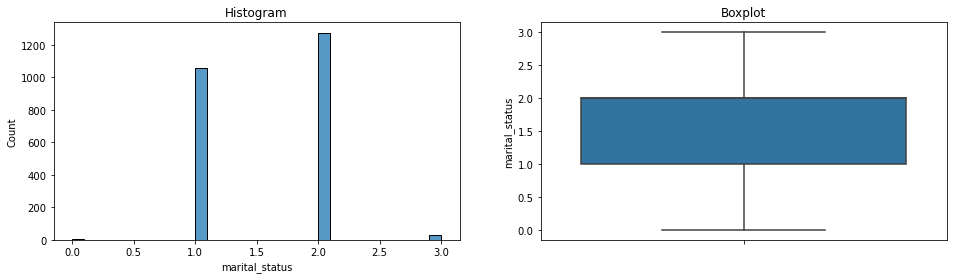

In [65]:
#Visualising the outliers
diagnostic_plots(X_train, 'marital_status')

> From the function, I can see that marital status has about 33 outliers. But after seeing the outliers with boxplot, I could not find any, so I will be leaving the outliers in. It wouldn't affect the outcome too much as it only is about 1% of the data

In [66]:
#Making a function to check the outliers of the data with Skewed Distributed 
def detect_skew(df, variable, distance):
    
    for i in variable:
        
        IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
        upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

        upper_boundary_count = df[(df[variable] > upper_boundary)][variable].count()

        lower_boundary_count = df[(df[variable] < lower_boundary)][variable].count()
        
        total_count = upper_boundary_count + lower_boundary_count

        percentage = (total_count/len(df[variable])*100)

        a = ({'Variable':variable, 'Total Outliers':total_count, 'Percentage':percentage})

    return print(a)

In [67]:
#Checking the outliers in the extreme range
for i in skew_dist:
    detect_skew(X_train, variable=i, distance=3)

{'Variable': 'limit_balance', 'Total Outliers': 2, 'Percentage': 0.08460236886632826}
{'Variable': 'education_level', 'Total Outliers': 2, 'Percentage': 0.08460236886632826}
{'Variable': 'age', 'Total Outliers': 0, 'Percentage': 0.0}
{'Variable': 'repay_sept', 'Total Outliers': 13, 'Percentage': 0.5499153976311337}
{'Variable': 'repay_aug', 'Total Outliers': 10, 'Percentage': 0.4230118443316413}
{'Variable': 'repay_july', 'Total Outliers': 14, 'Percentage': 0.5922165820642978}
{'Variable': 'repay_june', 'Total Outliers': 15, 'Percentage': 0.6345177664974619}
{'Variable': 'repay_may', 'Total Outliers': 14, 'Percentage': 0.5922165820642978}
{'Variable': 'repay_april', 'Total Outliers': 8, 'Percentage': 0.338409475465313}
{'Variable': 'bill_sept', 'Total Outliers': 57, 'Percentage': 2.4111675126903553}
{'Variable': 'bill_aug', 'Total Outliers': 56, 'Percentage': 2.3688663282571913}
{'Variable': 'bill_july', 'Total Outliers': 63, 'Percentage': 2.66497461928934}
{'Variable': 'bill_june', 'T

In [68]:
#Checking the outliers in the normal range
for i in skew_dist:
    detect_skew(X_train, variable=i, distance=1.5)

{'Variable': 'limit_balance', 'Total Outliers': 10, 'Percentage': 0.4230118443316413}
{'Variable': 'education_level', 'Total Outliers': 35, 'Percentage': 1.4805414551607445}
{'Variable': 'age', 'Total Outliers': 25, 'Percentage': 1.0575296108291032}
{'Variable': 'repay_sept', 'Total Outliers': 241, 'Percentage': 10.194585448392555}
{'Variable': 'repay_aug', 'Total Outliers': 338, 'Percentage': 14.297800338409475}
{'Variable': 'repay_july', 'Total Outliers': 338, 'Percentage': 14.297800338409475}
{'Variable': 'repay_june', 'Total Outliers': 285, 'Percentage': 12.055837563451776}
{'Variable': 'repay_may', 'Total Outliers': 258, 'Percentage': 10.913705583756345}
{'Variable': 'repay_april', 'Total Outliers': 260, 'Percentage': 10.998307952622675}
{'Variable': 'bill_sept', 'Total Outliers': 175, 'Percentage': 7.402707275803723}
{'Variable': 'bill_aug', 'Total Outliers': 179, 'Percentage': 7.571912013536379}
{'Variable': 'bill_july', 'Total Outliers': 187, 'Percentage': 7.910321489001692}
{'

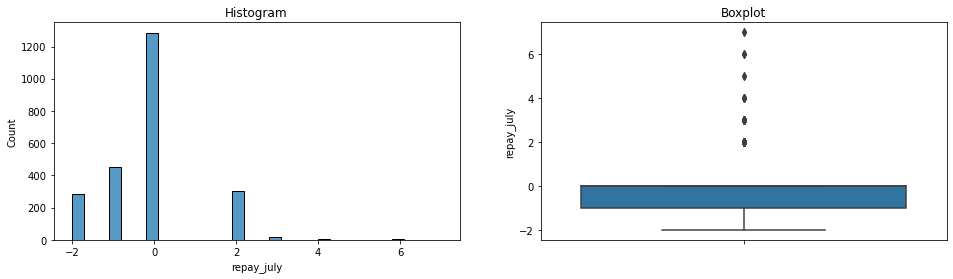

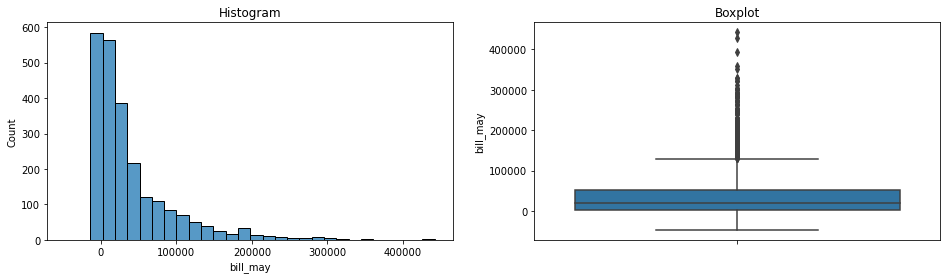

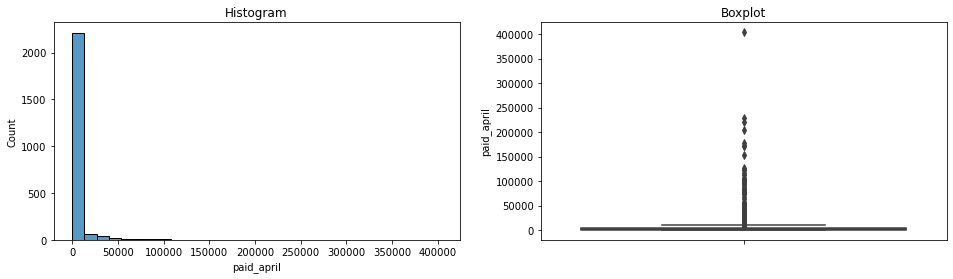

In [69]:
#Visualising the outliers
diagnostic_plots(X_train, 'repay_july')
diagnostic_plots(X_train, 'bill_may')
diagnostic_plots(X_train, 'paid_april')

> From the function and graphs above, I can say that the most outliers are in the skewed distrubution. But since the data is about the lateness of payment, there is obviously going to be outliers as some people do not have the luxury to pay their bills on time. Leading empty payments for certain months, and when they do pay could be in bulk or slowly overtime (depending on the person).

> The payments made after the empty payment months, would be the outliers. That is why I have made the decision to just remove the extreme outliers

In [70]:
#Censoring
windsoriser = Winsorizer(capping_method='iqr', 
                          tail='both',  #Censor both the right and left end outliers
                          fold=3, #In extreme range
                          variables=['bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
                          'paid_sept', 'paid_aug', 'paid_july', 'paid_june', 'paid_may', 'paid_april', 'repay_sept', 'repay_aug', 'repay_july', 
                          'repay_june', 'repay_may', 'repay_april'])

windsoriser.fit(X_train)

X_train_cen = windsoriser.transform(X_train)

In [71]:
#Checking the information before censoring
print('Dataframe - Before Capping')
print(X_train.describe())

Dataframe - Before Capping
       limit_balance          sex  education_level  marital_status  \
count    2364.000000  2364.000000      2364.000000     2364.000000   
mean   161049.069374     1.608291         1.855753        1.561760   
std    123414.186757     0.488235         0.781128        0.522042   
min     10000.000000     1.000000         0.000000        0.000000   
25%     50000.000000     1.000000         1.000000        1.000000   
50%    140000.000000     2.000000         2.000000        2.000000   
75%    230000.000000     2.000000         2.000000        2.000000   
max    800000.000000     2.000000         6.000000        3.000000   

               age   repay_sept    repay_aug   repay_july   repay_june  \
count  2364.000000  2364.000000  2364.000000  2364.000000  2364.000000   
mean     35.247039     0.016074    -0.114213    -0.123096    -0.177665   
std       9.114398     1.100800     1.174414     1.186248     1.164320   
min      21.000000    -2.000000    -2.000000  

In [72]:
#Checking the information after censoring
print('Dataframe - After Capping')
print(X_train_cen.describe())

Dataframe - After Capping
       limit_balance          sex  education_level  marital_status  \
count    2364.000000  2364.000000      2364.000000     2364.000000   
mean   161049.069374     1.608291         1.855753        1.561760   
std    123414.186757     0.488235         0.781128        0.522042   
min     10000.000000     1.000000         0.000000        0.000000   
25%     50000.000000     1.000000         1.000000        1.000000   
50%    140000.000000     2.000000         2.000000        2.000000   
75%    230000.000000     2.000000         2.000000        2.000000   
max    800000.000000     2.000000         6.000000        3.000000   

               age   repay_sept    repay_aug   repay_july   repay_june  \
count  2364.000000  2364.000000  2364.000000  2364.000000  2364.000000   
mean     35.247039     0.004230    -0.122673    -0.134941    -0.192893   
std       9.114398     1.050151     1.141756     1.140928     1.099771   
min      21.000000    -2.000000    -2.000000   

> After censoring or capping the outliers, I can see that the data has changed mainly in the max row. Example, whereas Before Censoring (repay_may) is 202076 and After Censoring 14851

Since there is no need to handle outliers in X_test, and there are no Missing Values. I will leave X_test as it is

### Feature Selection 

In [73]:
#Check X_train
X_train.head()

,limit_balance,sex,education_level,marital_status,age,repay_sept,repay_aug,repay_july,repay_june,repay_may,...,bill_july,bill_june,bill_may,bill_april,paid_sept,paid_aug,paid_july,paid_june,paid_may,paid_april
810,120000.0,1,1,2,28.0,-1.0,0.0,0.0,0.0,0,...,47023.0,53576.0,57529.0,61392.0,35000.0,5000.0,8000.0,5000.0,5000.0,4000.0
2575,160000.0,2,2,1,41.0,1.0,-1.0,-1.0,-1.0,-1,...,1496.0,1496.0,1496.0,1496.0,1496.0,1496.0,1496.0,1496.0,1496.0,1496.0
366,100000.0,2,3,3,43.0,0.0,0.0,0.0,0.0,0,...,64448.0,38500.0,39469.0,40653.0,2464.0,1902.0,1378.0,1589.0,2000.0,1506.0
2622,170000.0,2,2,2,34.0,-1.0,-1.0,-1.0,-1.0,-1,...,1122.0,1692.0,648.0,0.0,1599.0,1122.0,1692.0,648.0,0.0,631.0
2891,110000.0,2,2,2,36.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,0.0,780.0,0.0,0.0,0.0,0.0,0.0


> For feature selection, I have choice not to drop any columns as I feel as all of them are important due to personal judgement

### Feature Scaling

In [74]:
scaler = MinMaxScaler()
scaler.fit(X_train_cen)

X_train_scaled  = scaler.transform(X_train_cen)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled

array([[0.13924051, 0.        , 0.16666667, ..., 0.33218177, 0.33559299,
        0.25936132],
       [0.18987342, 1.        , 0.33333333, ..., 0.09938879, 0.10040942,
        0.09700113],
       [0.11392405, 1.        , 0.5       , ..., 0.10556737, 0.1342372 ,
        0.09764954],
       ...,
       [0.01265823, 0.        , 0.5       , ..., 0.        , 0.05114437,
        0.        ],
       [0.43037975, 0.        , 0.16666667, ..., 0.        , 0.        ,
        0.        ],
       [0.21518987, 1.        , 0.33333333, ..., 0.11692798, 0.05543996,
        0.05355811]])

> I have choice to use MinMaxScaler because most of the data are Skewed which wouldn't make much sense if I were to pick StandardScaler. And since I have already dealt with the outliers, it would make sense not to use RobustScaler

------------------------------------------------

## Model Definition
> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

> For the Models used, I'm using 8 different models to find the best income. All with using their base parameters and hypertuning (using GridSearchCV)

In [75]:
#Logistic Regression
log_model = LogisticRegression()

#Grid Search
c_values = [100, 10, 1.0, 0.1, 0.01]
solvers = ['newton-cg', 'lbfgs', 'liblinear']
param_log = dict(solver=solvers, C=c_values)
grid_log = GridSearchCV(LogisticRegression(), param_grid=param_log, cv=5)

In [76]:
#Support Vector Machine
svm_clf = SVC()

#Grid Search
param_svm = {'C': [0.01, 0.1, 1, 10],
              'gamma': [0.01, 0.1, 1, 10]}
grid_svm = GridSearchCV(SVC(), param_grid=param_svm, cv=5)

In [77]:
#Decision Tree
tree_clf = DecisionTreeClassifier()

#Grid Search
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10]
param_dt = dict(criterion=criterion, max_depth=max_depth)
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=param_dt, cv=5)

In [78]:
#Bagging
bag_clf = BaggingClassifier(DecisionTreeClassifier())

#Grid Search
n_estimators = [100,200,300,400,500]
max_samples = [20,40,60,80,100]
param_bag = dict(n_estimators=n_estimators, max_samples=max_samples)
grid_bag = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), param_grid=param_bag, cv=5)

In [79]:
#AdaBoosting
ada_clf = AdaBoostClassifier()

#Grid Search
param_ada = {
    'n_estimators': [50, 100, 200, 250],
    'learning_rate': [0.1, 1, 10, 100],
    'algorithm': ['SAMME', 'SAMME.R']
}
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid=param_ada, cv=5)

In [80]:
#Random Forest
rnf_clf = RandomForestClassifier()

#Grid Search
n_estimators = [100,200,300,400,500]
criterion = ['gini', 'entropy']
param_rf = dict(criterion=criterion, n_estimators=n_estimators)
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_rf, cv=5)

In [81]:
#KNN
knn_clf = KNeighborsClassifier()

#Grid Search
leaf_size = list(range(30,50))
n_neighbors = list(range(5,20))
param_knn = dict(leaf_size=leaf_size, n_neighbors=n_neighbors)
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_knn, cv=5)

In [82]:
#Naive Bayes
nb_clf = GaussianNB()

#Grid Search
param_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
grid_nb = GridSearchCV(GaussianNB(), param_grid=param_nb, cv=5)

> For the GridSeachCV of each Models, I have choice not to use too much parameters as it would be heavy and slow down the process by alot. That is why I have chosen at max 3 parameters to be used. I have also chosen the parameters that I felt as the most important and will affect the outcome for the better

------------------------------------------------

## Model Training
> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

Logistic Regression

In [83]:
#Training the base model
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [84]:
#Training the model with Hyperparameters
grid_log.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

SVM

In [85]:
#Training the base model
svm_clf.fit(X_train_scaled, y_train)

SVC()

In [86]:
#Training the model with Hyperparameters
grid_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]})

Decision Tree

In [87]:
#Training the base model
tree_clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [88]:
#Training the model with Hyperparameters
grid_dt.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10]})

Bagging

In [89]:
#Training the base model
bag_clf.fit(X_train_scaled, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [90]:
#Training the model with Hyperparameters
grid_bag.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'max_samples': [20, 40, 60, 80, 100],
                         'n_estimators': [100, 200, 300, 400, 500]})

AdaBoosting

In [91]:
#Training the base model
ada_clf.fit(X_train_scaled, y_train)

AdaBoostClassifier()

In [92]:
#Training the model with Hyperparameters
grid_ada.fit(X_train_scaled, y_train)

c:\Users\Hugo\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
c:\Users\Hugo\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
c:\Users\Hugo\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
c:\Users\Hugo\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
c:\Users\Hugo\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 1, 10, 100],
                         'n_estimators': [50, 100, 200, 250]})

Random Forest

In [93]:
#Training the base model
rnf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [94]:
#Training the model with Hyperparameters
grid_rf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 200, 300, 400, 500]})

KNN

In [95]:
#Training the base model
knn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [96]:
#Training the model with Hyperparameters
grid_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
                                       40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
                         'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19]})

Naive Bayes

In [97]:
#Training the base model
nb_clf.fit(X_train_scaled, y_train)

GaussianNB()

In [98]:
#Training the model with Hyperparameters
grid_nb.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

------------------------------------------------

## Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

#### Logistic Regression

In [99]:
#Predict trainset and test set
y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

In [100]:
print("Best cross-validation accuracy: {:.2f}".format(grid_log.best_score_))
print("Best parameters: ", grid_log.best_params_)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_log))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_log))

Best cross-validation accuracy: 0.83
Best parameters:  {'C': 100, 'solver': 'newton-cg'}
accuracy score train :  0.8282571912013537
accuracy score test :  0.8240270727580372


> I can see that after searching for the best parameters has come out to {'C': 100, 'solver': 'newton-cg'}

> From the prediction made above, I can see that the model with the hyperparameter tuning has slightly outperformed the base model, by 1%

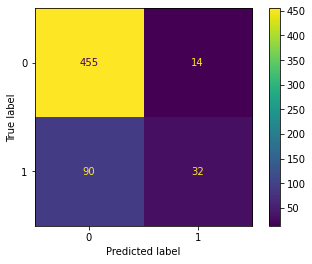

In [101]:
#No Hyperparameter
cm = confusion_matrix(y_test, y_pred_test_log, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

disp.plot()
plt.show()

> From the graph above, I can see how many correct and incorrect answer the base model has given. Example, it predicted 0 90 times on which the correct answer is 1

#### SVM

In [102]:
#Predict trainset and test set
y_pred_train_svm = svm_clf.predict(X_train_scaled)
y_pred_test_svm = svm_clf.predict(X_test_scaled)

In [103]:
print("Best cross-validation accuracy: {:.2f}".format(grid_svm.best_score_))
print("Best parameters: ", grid_svm.best_params_)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_svm))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_svm))

Best cross-validation accuracy: 0.84
Best parameters:  {'C': 10, 'gamma': 0.1}
accuracy score train :  0.8477157360406091
accuracy score test :  0.8257191201353637


> I can see that after searching for the best parameters has come out to {'C': 10, 'gamma': 0.1}

> From the prediction made above, I can see that the model with the hyperparameter tuning has slightly outperformed the base model, by 2%

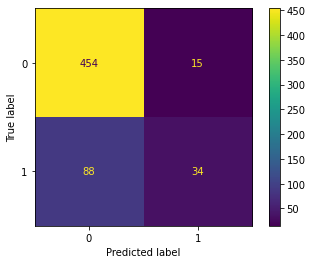

In [104]:
#No Hyperparameter
cm = confusion_matrix(y_test, y_pred_test_svm, labels=svm_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_clf.classes_)

disp.plot()
plt.show()

> From the graph above, I can see how many correct and incorrect answer the base model has given. Example, it predicted 0 88 times on which the correct answer is 1

#### Decision Tree

In [105]:
#Predict trainset and test set
y_pred_train_dt = tree_clf.predict(X_train_scaled)
y_pred_test_dt = tree_clf.predict(X_test_scaled)

In [106]:
print("Best cross-validation accuracy: {:.2f}".format(grid_dt.best_score_))
print("Best parameters: ", grid_dt.best_params_)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_dt))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_dt))

Best cross-validation accuracy: 0.84
Best parameters:  {'criterion': 'gini', 'max_depth': 2}
accuracy score train :  1.0
accuracy score test :  0.7309644670050761


> I can see that after searching for the best parameters has come out to {'criterion': 'gini', 'max_depth': 2}

> From the base model, I can see that the model is kind of overfit as it got 100% on the train set and only 73% on the test set. This could be fixed or improved by handling outliers better, hyperparameter tuning and etc,

> From the prediction made above, I can see that the model with the hyperparameter tuning has slightly outperformed the base model, by 11%

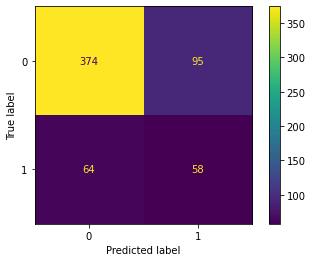

In [107]:
#No Hyperparameter
cm = confusion_matrix(y_test, y_pred_test_dt, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_)

disp.plot()
plt.show()

> From the graph above, I can see how many correct and incorrect answer the base model has given. Example, it predicted 0 64 times on which the correct answer is 1

#### Bagging

In [108]:
y_pred_train_bag = bag_clf.predict(X_train_scaled)
y_pred_test_bag = bag_clf.predict(X_test_scaled)

In [109]:
print("Best cross-validation accuracy: {:.2f}".format(grid_bag.best_score_))
print("Best parameters: ", grid_bag.best_params_)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_bag))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_bag))

Best cross-validation accuracy: 0.84
Best parameters:  {'max_samples': 60, 'n_estimators': 400}
accuracy score train :  0.9801184433164128
accuracy score test :  0.8121827411167513


> I can see that after searching for the best parameters has come out to {'max_samples': 60, 'n_estimators': 500}

> From the base model, you coukd argue that the model is overfit as it got 98% on the train set and only 81% on the test set. Which again could be improved with handling outliers better and adding hyperparameters

> From the prediction made above, I can see that the model with the hyperparameter tuning has slightly outperformed the base model, by 3%

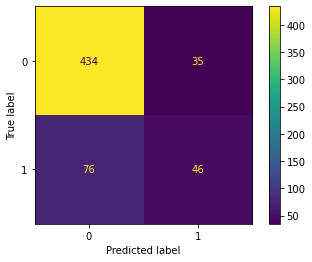

In [110]:
#No Hyperparameter
cm = confusion_matrix(y_test, y_pred_test_bag, labels=bag_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=bag_clf.classes_)

disp.plot()
plt.show()

> From the graph above, I can see how many correct and incorrect answer the base model has given. Example, it predicted 0 76 times on which the correct answer is 1

#### AdaBoosting

In [111]:
y_pred_train_ada = ada_clf.predict(X_train_scaled)
y_pred_test_ada = ada_clf.predict(X_test_scaled)

In [112]:
print("Best cross-validation accuracy: {:.2f}".format(grid_ada.best_score_))
print("Best parameters: ", grid_ada.best_params_)
best_grid_ada = grid_ada.best_params_
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_ada))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_ada))

Best cross-validation accuracy: 0.84
Best parameters:  {'algorithm': 'SAMME', 'learning_rate': 10, 'n_estimators': 50}
accuracy score train :  0.8460236886632826
accuracy score test :  0.8274111675126904


> I can see that after searching for the best parameters has come out to {'algorithm': 'SAMME', 'learning_rate': 10, 'n_estimators': 50}

> This model is best performing on both the GridSearchCV and the base model, this could be attributed to the more hyperparameters on GridSearchCV and a better dataset for AdaBoosting

> From the prediction made above, I can see that the model with the hyperparameter tuning has slightly outperformed the base model, by 2%

In [113]:
ada_clf_f = AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 0.1, n_estimators= 200)
ada_clf_f.fit(X_train_scaled, y_train)
y_pred_train_ada_f = ada_clf_f.predict(X_train_scaled)
y_pred_test_ada_f = ada_clf_f.predict(X_test_scaled)

> Since this model is the best amongst the rest, I will be making a new model with all the hyperparameters in it to be used with the data inference

#### Random Forest

In [114]:
#Predict trainset and test set
y_pred_train_rf = rnf_clf.predict(X_train_scaled)
y_pred_test_rf = rnf_clf.predict(X_test_scaled)

In [115]:
print("Best cross-validation accuracy: {:.2f}".format(grid_rf.best_score_))
print("Best parameters: ", grid_rf.best_params_)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_rf))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_rf))

Best cross-validation accuracy: 0.83
Best parameters:  {'criterion': 'entropy', 'n_estimators': 100}
accuracy score train :  1.0
accuracy score test :  0.8206429780033841


> I can see that after searching for the best parameters has come out to {'criterion': 'entropy', 'n_estimators': 300}

> From the base Model, I can see that the model is overfit with a 100% on the train set and a 82% on the test set. Which can be improved with handling outliers better and adding hyperparameters to it

> From the prediction made above, I can see that the model with the hyperparameter tuning has slightly outperformed the base model, by 1%

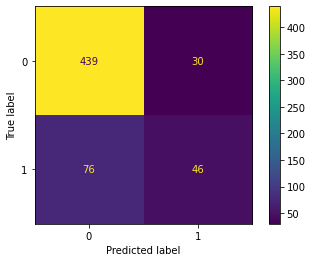

In [116]:
#No Hyperparameter
cm = confusion_matrix(y_test, y_pred_test_rf, labels=rnf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rnf_clf.classes_)

disp.plot()
plt.show()

> From the graph above, I can see how many correct and incorrect answer the base model has given. Example, it predicted 0 76 times on which the correct answer is 1

#### KNN

In [117]:
#Predict trainset and test set
y_pred_train_knn = knn_clf.predict(X_train_scaled)
y_pred_test_knn = knn_clf.predict(X_test_scaled)

In [118]:
print("Best cross-validation accuracy: {:.2f}".format(grid_knn.best_score_))
print("Best parameters: ", grid_knn.best_params_)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_knn))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_knn))

Best cross-validation accuracy: 0.82
Best parameters:  {'leaf_size': 30, 'n_neighbors': 19}
accuracy score train :  0.8519458544839256
accuracy score test :  0.805414551607445


> I can see that after searching for the best parameters has come out to {'leaf_size': 30, 'n_neighbors': 19}

> From the prediction made above, I can see that the model with the hyperparameter tuning has slightly outperformed the base model, by 2%

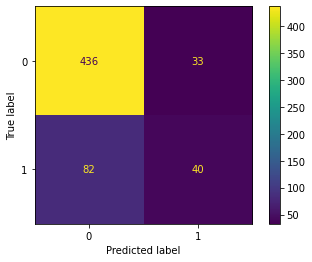

In [119]:
#No Hyperparameter
cm = confusion_matrix(y_test, y_pred_test_knn, labels=knn_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn_clf.classes_)

disp.plot()
plt.show()

> From the graph above, I can see how many correct and incorrect answer the base model has given. Example, it predicted 0 82 times on which the correct answer is 1

#### Naive Bayes

In [120]:
#Predict trainset and test set
y_pred_train_nb = nb_clf.predict(X_train_scaled)
y_pred_test_nb = nb_clf.predict(X_test_scaled)

In [121]:
print("Best cross-validation accuracy: {:.2f}".format(grid_nb.best_score_))
print("Best parameters: ", grid_nb.best_params_)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_nb))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_nb))

Best cross-validation accuracy: 0.82
Best parameters:  {'var_smoothing': 0.533669923120631}
accuracy score train :  0.7855329949238579
accuracy score test :  0.7749576988155669


> I can see that after searching for the best parameters has come out to {'var_smoothing': 0.533669923120631}

> The Model with the hyperparameters could be improved on more, if I were to add more parameters to it as this is the only Model with only 1 parameter to it

> From the prediction made above, I can see that the model with the hyperparameter tuning has slightly outperformed the base model, by 5%

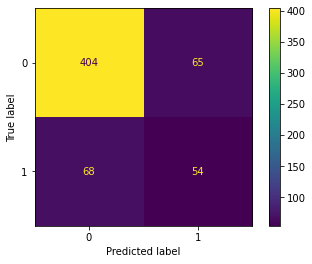

In [122]:
#No Hyperparameter
cm = confusion_matrix(y_test, y_pred_test_nb, labels=nb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=nb_clf.classes_)

disp.plot()
plt.show()

> From the graph above, I can see how many correct and incorrect answer the base model has given. Example, it predicted 1 54 times on which the correct answer is 0

In [123]:
# Model Saving
with open('model_scaler.pkl', 'wb') as file1:
    pickle.dump(scaler, file1)

with open('model_ada.pkl', 'wb') as file2:
    pickle.dump(ada_clf_f, file2)

> I am saving the AdaBoost Model to be used on the Data Inference

------------------------------------------------

## Model Inference
> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [124]:
# Model Loading
with open('model_scaler.pkl', 'rb') as file1:
    model_scaler = pickle.load(file1)

with open('model_ada.pkl', 'rb') as file2:
    ada_clf_f = pickle.load(file2)

In [125]:
data_inf

,limit_balance,sex,education_level,marital_status,age,repay_sept,repay_aug,repay_july,repay_june,repay_may,...,bill_june,bill_may,bill_april,paid_sept,paid_aug,paid_july,paid_june,paid_may,paid_april,default_payment_next_month
0,420000.0,2,2,2,32.0,0.0,0.0,0.0,0.0,0,...,198925.0,175684.0,164037.0,7300.0,8839.0,8000.0,5900.0,6000.0,6000.0,0
1,30000.0,2,2,2,25.0,2.0,0.0,0.0,0.0,0,...,12473.0,12623.0,27460.0,1200.0,1201.0,592.0,500.0,1500.0,0.0,1
2,40000.0,2,3,1,60.0,0.0,0.0,0.0,0.0,0,...,21058.0,8204.0,9899.0,2000.0,3000.0,3000.0,6000.0,2000.0,2000.0,0
3,70000.0,2,3,3,39.0,0.0,0.0,-1.0,0.0,-1,...,15133.0,3148.0,4699.0,3000.0,11000.0,5000.0,3150.0,2000.0,4000.0,0
4,60000.0,2,2,2,24.0,-1.0,0.0,-1.0,0.0,0,...,10213.0,10000.0,11832.0,1020.0,9479.0,1000.0,200.0,1832.0,5889.0,0
5,300000.0,2,1,1,30.0,0.0,0.0,0.0,0.0,0,...,76244.0,67747.0,70389.0,3000.0,5000.0,2500.0,2500.0,3500.0,87000.0,1
6,500000.0,1,1,2,43.0,0.0,0.0,0.0,-1.0,-1,...,3887.0,0.0,7413.0,22650.0,0.0,3887.0,0.0,7413.0,0.0,1
7,490000.0,2,2,1,30.0,0.0,0.0,0.0,0.0,0,...,16995.0,-1527.0,62491.0,2003.0,2041.0,1092.0,4.0,64895.0,3003.0,0
8,80000.0,1,1,2,26.0,1.0,2.0,2.0,0.0,0,...,40793.0,42990.0,42854.0,2000.0,0.0,1603.0,3000.0,2000.0,1056.0,0
9,130000.0,2,2,1,34.0,2.0,2.0,2.0,2.0,2,...,32336.0,34186.0,34588.0,2500.0,3000.0,0.0,2600.0,1000.0,1500.0,1


In [126]:
#Dropping the target so the data inference can predict it
X_data = data_inf.drop(['default_payment_next_month'], axis=1)
X_data

,limit_balance,sex,education_level,marital_status,age,repay_sept,repay_aug,repay_july,repay_june,repay_may,...,bill_july,bill_june,bill_may,bill_april,paid_sept,paid_aug,paid_july,paid_june,paid_may,paid_april
0,420000.0,2,2,2,32.0,0.0,0.0,0.0,0.0,0,...,203118.0,198925.0,175684.0,164037.0,7300.0,8839.0,8000.0,5900.0,6000.0,6000.0
1,30000.0,2,2,2,25.0,2.0,0.0,0.0,0.0,0,...,12082.0,12473.0,12623.0,27460.0,1200.0,1201.0,592.0,500.0,1500.0,0.0
2,40000.0,2,3,1,60.0,0.0,0.0,0.0,0.0,0,...,18519.0,21058.0,8204.0,9899.0,2000.0,3000.0,3000.0,6000.0,2000.0,2000.0
3,70000.0,2,3,3,39.0,0.0,0.0,-1.0,0.0,-1,...,10803.0,15133.0,3148.0,4699.0,3000.0,11000.0,5000.0,3150.0,2000.0,4000.0
4,60000.0,2,2,2,24.0,-1.0,0.0,-1.0,0.0,0,...,9479.0,10213.0,10000.0,11832.0,1020.0,9479.0,1000.0,200.0,1832.0,5889.0
5,300000.0,2,1,1,30.0,0.0,0.0,0.0,0.0,0,...,88446.0,76244.0,67747.0,70389.0,3000.0,5000.0,2500.0,2500.0,3500.0,87000.0
6,500000.0,1,1,2,43.0,0.0,0.0,0.0,-1.0,-1,...,0.0,3887.0,0.0,7413.0,22650.0,0.0,3887.0,0.0,7413.0,0.0
7,490000.0,2,2,1,30.0,0.0,0.0,0.0,0.0,0,...,24488.0,16995.0,-1527.0,62491.0,2003.0,2041.0,1092.0,4.0,64895.0,3003.0
8,80000.0,1,1,2,26.0,1.0,2.0,2.0,0.0,0,...,40137.0,40793.0,42990.0,42854.0,2000.0,0.0,1603.0,3000.0,2000.0,1056.0
9,130000.0,2,2,1,34.0,2.0,2.0,2.0,2.0,2,...,33071.0,32336.0,34186.0,34588.0,2500.0,3000.0,0.0,2600.0,1000.0,1500.0


In [127]:
#Scaling the data inference
data_inf_scaled = model_scaler.transform(X_data)

In [128]:
#Predicting data inference using AdaBoosting
y_pred_inf = ada_clf_f.predict(data_inf_scaled)
y_pred_inf

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [129]:
#Showing the prediction as a table
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Payment - Prediction'])
y_pred_inf_df

,Payment - Prediction
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1


In [130]:
#Merge it together
pd.concat([data_inf, y_pred_inf_df], axis=1)

,limit_balance,sex,education_level,marital_status,age,repay_sept,repay_aug,repay_july,repay_june,repay_may,...,bill_may,bill_april,paid_sept,paid_aug,paid_july,paid_june,paid_may,paid_april,default_payment_next_month,Payment - Prediction
0,420000.0,2,2,2,32.0,0.0,0.0,0.0,0.0,0,...,175684.0,164037.0,7300.0,8839.0,8000.0,5900.0,6000.0,6000.0,0,0
1,30000.0,2,2,2,25.0,2.0,0.0,0.0,0.0,0,...,12623.0,27460.0,1200.0,1201.0,592.0,500.0,1500.0,0.0,1,1
2,40000.0,2,3,1,60.0,0.0,0.0,0.0,0.0,0,...,8204.0,9899.0,2000.0,3000.0,3000.0,6000.0,2000.0,2000.0,0,0
3,70000.0,2,3,3,39.0,0.0,0.0,-1.0,0.0,-1,...,3148.0,4699.0,3000.0,11000.0,5000.0,3150.0,2000.0,4000.0,0,0
4,60000.0,2,2,2,24.0,-1.0,0.0,-1.0,0.0,0,...,10000.0,11832.0,1020.0,9479.0,1000.0,200.0,1832.0,5889.0,0,0
5,300000.0,2,1,1,30.0,0.0,0.0,0.0,0.0,0,...,67747.0,70389.0,3000.0,5000.0,2500.0,2500.0,3500.0,87000.0,1,0
6,500000.0,1,1,2,43.0,0.0,0.0,0.0,-1.0,-1,...,0.0,7413.0,22650.0,0.0,3887.0,0.0,7413.0,0.0,1,0
7,490000.0,2,2,1,30.0,0.0,0.0,0.0,0.0,0,...,-1527.0,62491.0,2003.0,2041.0,1092.0,4.0,64895.0,3003.0,0,0
8,80000.0,1,1,2,26.0,1.0,2.0,2.0,0.0,0,...,42990.0,42854.0,2000.0,0.0,1603.0,3000.0,2000.0,1056.0,0,0
9,130000.0,2,2,1,34.0,2.0,2.0,2.0,2.0,2,...,34186.0,34588.0,2500.0,3000.0,0.0,2600.0,1000.0,1500.0,1,1


> From the table above, I can see that it got 80% correct from 10 rows/data. Which is correct from what it predicted up above

------------------------------------------------

## Pengambilan Kesimpulan
> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

In [131]:
#Classification Report of AdaBoosting (hyperparameter)
print(classification_report(y_test, y_pred_test_ada_f))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       469
           1       0.65      0.35      0.46       122

    accuracy                           0.83       591
   macro avg       0.75      0.65      0.68       591
weighted avg       0.81      0.83      0.81       591



> From the report above, I can see that F1-score is better on 0 while 1 is underperforming with a value of 46%

From all the model used, I can see that AdaBoosting has the best outcome with about 2% better prediction rate than the others. Now this could be because I have added the most parameters on the GridSearchCV with 3 parameters, while others got 2 or even 1.

And while the models could be improved on even more with better hyperparameter tuning, since I had to use about 6 different Machine Learning Models. I feared that it would take too long to run each GridSeachCV, so I chose to restrict to the parameters which I felt as the most important (with the average coming out with 2 parameters)

After all that, I can say that I am satisfied with the outcome of most models as it came with a correct prediction rate of over 80% (using GridSearchCV)